https://krassowski.github.io/complex-upset/articles/Examples_Python.html

# UPSET

In [22]:
#!pip install pandas pydataset rpy2


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np
from datetime import datetime

In [2]:
PATH = "/media/user/Seagate_RNA/PCNSL_PSL/1_patches_filiot_224/"
PATH_json = '/media/user/Seagate_RNA/PCNSL_PSL/3_hovernet_normalisation_reinhard_224/'
PATH_histo = "/media/user/Seagate_RNA/PCNSL_PSL/4_pyradiomics_patches/"
#PATH_output_mask_nuclei = "/media/user/Ligue_RNA_2partie/PCNSL_2022/masks_nuclei_pyradiomics/"
PATH_output_mask_nuclei = "/media/user/Seagate_RNA/PCNSL_PSL/4_masks_nuclei_pyradiomics//"

PATH_df_pyradiomics = "/media/user/Seagate_RNA/PCNSL_PSL/4_df_pyradiomics/"
PATH_df_count_cells = '/media/user/Seagate_RNA/PCNSL_PSL/4_df_count_cells/'

PATH_output = '/media/user/Seagate_RNA/PCNSL_PSL/4_df_count_cells/'

In [3]:
%%capture
%load_ext rpy2.ipython

In [4]:
%%R
if (!require(devtools, quietly=T)) install.packages("devtools")
if (!require(ComplexUpset, quietly=T)) devtools::install_github("krassowski/complex-upset")

In addition: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages


In [5]:
%%R
library(ggplot2)
library(ComplexUpset)

# PSL dataset

In [6]:
df_meta = pd.read_csv('/media/user/Seagate_RNA/PCNSL_PSL/metadata_106.csv', sep=',')

In [7]:
df_meta

,ID_patient,MYD88_status,IK,Age,B.cells.naive,B.cells.memory,Plasma.cells,T.cells.CD8,T.cells.CD4.naive,T.cells.CD4.memory.resting,...,Sex,Cluster_consensus,CD37_IHC,Overall.Survival.Status,CD37_exp_degnorm,MSKCC,Nom,Prenom,Dx,Date_naissance
0,N0400068,NaN,60,64,0.183022,0.269397,0.000000,0.027028,0.000000,0.109181,...,F,2,NaN,NaN,NaN,NaN,BROHAN,Madeleine,2004-01-23,18/12/1939
1,N0400928,NaN,100,67,0.264259,0.227902,0.000000,0.108514,0.000000,0.000000,...,H,4,NaN,NaN,NaN,NaN,TAZI,Abdelali,2004-09-17,22/05/1937
2,N0500243,NaN,80,68,0.006019,0.098996,0.020037,0.145618,0.000000,0.212492,...,F,4,NaN,NaN,NaN,NaN,GAILLARD,Marie Louise,2005-03-11,23/03/1936
3,N0500348,NaN,70,59,0.261506,0.289253,0.026189,0.018083,0.000000,0.117035,...,F,2,NaN,NaN,NaN,NaN,LOPES BARBOSA,Maria,2005-04-13,26/12/1945
4,N0500355,NaN,70,67,0.145007,0.599799,0.000000,0.025264,0.000000,0.044362,...,F,1,NaN,NaN,NaN,NaN,CHAUVIN,Monique,2005-04-14,25/08/1937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,N1900203,NaN,60,71,0.148018,0.557112,0.000000,0.014084,0.042166,0.000000,...,M,1,0.5,LIVING,14.538809,Class3,NaN,NaN,NaN,NaN
102,N1900271,NaN,70,77,0.188809,0.037475,0.000000,0.175012,0.000000,0.006473,...,F,4,0.0,LIVING,12.949295,Class2,NaN,NaN,NaN,NaN
103,N1900390,WT,40,75,0.321294,0.338872,0.010710,0.003311,0.000000,0.072014,...,M,3,0.0,LIVING,13.029723,Class3,Ferrand,Jean,2019-03-19,1943-04-21
104,N1900543,Mutated,70,53,0.051495,0.285750,0.028830,0.109683,0.000000,0.000000,...,F,4,0.0,DECEASED,11.969008,Class2,Sahraoui,Messaouda,2019-04-18,1966-02-24


In [8]:
df_meta['cluster_int'] = df_meta['Cluster_consensus'].astype(int)

In [9]:
df_meta[['ID_patient', 'IK', 'Age', 'MYD88_status']]

,ID_patient,IK,Age,MYD88_status
0,N0400068,60,64,NaN
1,N0400928,100,67,NaN
2,N0500243,80,68,NaN
3,N0500348,70,59,NaN
4,N0500355,70,67,NaN
...,...,...,...,...
101,N1900203,60,71,NaN
102,N1900271,70,77,NaN
103,N1900390,40,75,WT
104,N1900543,70,53,Mutated


In [10]:
df_meta[['IK', 'Age', 'Cluster_consensus']].to_csv('/media/user/Seagate_RNA/PCNSL_PSL/df_meta_ik_age_cluster.csv')
df_meta_ikage = df_meta[['IK', 'Age', 'Cluster_consensus', 'Sex']]
df_meta_ikage.rename(columns={'IK':'KPS'}, inplace=True)

/tmp/ipykernel_18695/3973411784.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meta_ikage.rename(columns={'IK':'KPS'}, inplace=True)


In [11]:
df_meta_ikage.reset_index(inplace=True)
df_meta_ikage['Sex_true'] = np.where(df_meta_ikage['Sex']=='F', 'F', 'M')
df_meta_ikage.drop(columns='Sex', inplace=True)
df_meta_ikage.rename(columns={'Sex_true':'Gender'}, inplace=True)
df_meta_ikage.head()

/tmp/ipykernel_18695/2288878862.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meta_ikage['Sex_true'] = np.where(df_meta_ikage['Sex']=='F', 'F', 'M')
/tmp/ipykernel_18695/2288878862.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meta_ikage.drop(columns='Sex', inplace=True)
/tmp/ipykernel_18695/2288878862.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_meta_

,index,KPS,Age,Cluster_consensus,Gender
0,0,60,64,2,F
1,1,100,67,4,M
2,2,80,68,4,F
3,3,70,59,2,F
4,4,70,67,1,F


In [12]:
dummies = pd.get_dummies(df_meta_ikage['Cluster_consensus'])
dummies.reset_index(inplace=True)
dummies.head()

,index,1,2,3,4
0,0,0,1,0,0
1,1,0,0,0,1
2,2,0,0,0,1
3,3,0,1,0,0
4,4,1,0,0,0


In [13]:
test = pd.merge(df_meta_ikage,dummies, on='index')
test.drop(columns=['Cluster_consensus', 'index'], inplace=True)
test2 = test.drop(columns=['KPS', 'Age', 'Gender'])
test2.head()

,1,2,3,4
0,0,1,0,0
1,0,0,0,1
2,0,0,0,1
3,0,1,0,0
4,1,0,0,0


In [14]:
test3 = pd.merge(test2.reset_index(), test[['KPS', 'Age', 'Gender']].reset_index(), on='index', how='left')
test3.drop(columns='index', inplace=True)

In [15]:
cluster = list(test2.columns)
cluster

[1, 2, 3, 4]

In [16]:
%R -i test -i cluster -i test2 -i test3

In [17]:
test3

,1,2,3,4,KPS,Age,Gender
0,0,1,0,0,60,64,F
1,0,0,0,1,100,67,M
2,0,0,0,1,80,68,F
3,0,1,0,0,70,59,F
4,1,0,0,0,70,67,F
...,...,...,...,...,...,...,...
101,1,0,0,0,60,71,M
102,0,0,0,1,70,77,F
103,0,0,1,0,40,75,M
104,0,0,0,1,70,53,F


In [18]:
cluster

[1, 2, 3, 4]

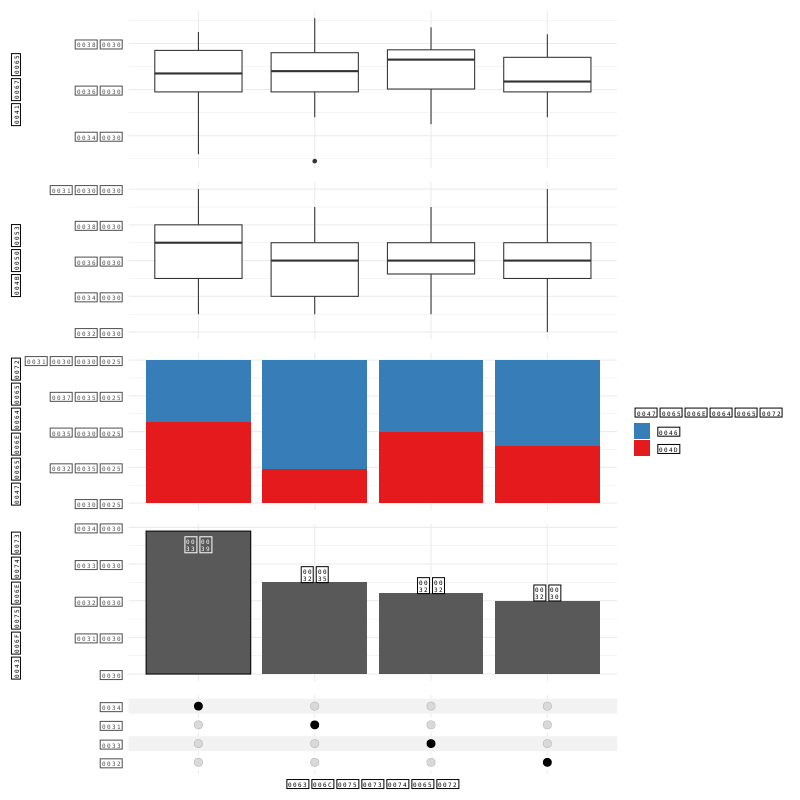

In [20]:
%%R -w 800 -h 800

set.seed(0)   # keep the same jitter for identical plots
# Opening the graphical device
upset(
    test3,
    cluster,
    name='cluster',
    base_annotations=list(
        'Counts '=intersection_size()
        )
    ,
    set_sizes=FALSE,
    annotations = list(
'Age'=upset_annotate('Age', geom_boxplot(na.rm=TRUE)),
  'KPS'=upset_annotate('KPS', geom_boxplot(na.rm=TRUE))
        
                ,'Gender'=(
            ggplot(mapping=aes(fill=Gender))
            + geom_bar(stat='count', position='fill')
            + scale_y_continuous(labels=scales::percent_format())
            + scale_fill_manual(values=c(
                'M'='#E41A1C', 'F'='#377EB8'
            ))
            + ylab('Gender')
        )  
        
    
        
    ),
    min_size=10,
    width_ratio=0.1
)




In [ ]:
%%R -w 800 -h 800

set.seed(0)   # keep the same jitter for identical plots
# Opening the graphical device
pdf("/home/user/Code/PCNSL_PSL/combination_IK_Age_Sex_counts.svg")
p<-upset(
    test3,
    cluster,
    name='cluster',
    base_annotations=list(
        'Counts '=intersection_size()
        )
    ,
    set_sizes=FALSE,
    annotations = list(
'Age'=upset_annotate('Age', geom_boxplot(na.rm=TRUE)),
  'KPS'=upset_annotate('KPS', geom_boxplot(na.rm=TRUE))
        
                ,'Gender'=(
            ggplot(mapping=aes(fill=Gender))
            + geom_bar(stat='count', position='fill')
            + scale_y_continuous(labels=scales::percent_format())
            + scale_fill_manual(values=c(
                'M'='#E41A1C', 'F'='#377EB8'
            ))
            + ylab('Gender')
        )  
        
    
        
    ),
    min_size=10,
    width_ratio=0.1
)


p


# Closing the graphical device
dev.off()

In [ ]:
%%R
#install.packages("sjPlot")

library(sjPlot)
save_plot("combination_IK_Age_Sex_counts.svg", fig = p, width=10, height=20)